In [8]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [9]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [10]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_LDS_Sweep = pathTT + "20240503_Fig1_NBFF_LDS_TT_GRU_Sweep/"
subfolders_LDS = [f.path for f in os.scandir(path_LDS_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240503_Fig1_NBFF_NODE_TT_GRU_Sweep/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]


/home/csverst/Github/CtDBenchmark/


In [11]:

from ctd.comparison.analysis.external.ext import Analysis_Ext
slds_path = "/home/csverst/Github/CtDBenchmark/sldsV2/"

slds3_1 = Analysis_Ext(run_name = "SLDS3_1", filepath = slds_path + "slds_3bff_v2_3_Run1.h5")
slds3_2 = Analysis_Ext(run_name = "SLDS3_3", filepath = slds_path + "slds_3bff_v2_3_Run2.h5")
slds3_3 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run3.h5")
slds3_4 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run4.h5")
slds3_5 = Analysis_Ext(run_name = "SLDS3_5", filepath = slds_path + "slds_3bff_v2_3_Run5.h5")
slds8_1 = Analysis_Ext(run_name = "SLDS8_1", filepath = slds_path + "slds_3bff_v2_8_Run1.h5")
slds8_2 = Analysis_Ext(run_name = "SLDS8_2", filepath = slds_path + "slds_3bff_v2_8_Run2.h5")
slds8_3 = Analysis_Ext(run_name = "SLDS8_3", filepath = slds_path + "slds_3bff_v2_8_Run3.h5")
slds8_4 = Analysis_Ext(run_name = "SLDS8_4", filepath = slds_path + "slds_3bff_v2_8_Run4.h5")
slds8_5 = Analysis_Ext(run_name = "SLDS8_5", filepath = slds_path + "slds_3bff_v2_8_Run5.h5")

<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>


In [12]:
comparison = Comparison(comparison_tag="Figure1NBFF_TTGRU_Sweep")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LDS:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_NODE = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_NODE, group = "NODE")

train_true_rates = analysis_GRU.get_true_rates(phase = 'train')
eval_true_rates = analysis_GRU.get_true_rates(phase = 'val')

slds3_1.add_true_rates(train_true_rates, eval_true_rates)
slds3_2.add_true_rates(train_true_rates, eval_true_rates)
slds3_3.add_true_rates(train_true_rates, eval_true_rates)
slds3_4.add_true_rates(train_true_rates, eval_true_rates)
slds3_5.add_true_rates(train_true_rates, eval_true_rates)
slds8_1.add_true_rates(train_true_rates, eval_true_rates)
slds8_2.add_true_rates(train_true_rates, eval_true_rates)
slds8_3.add_true_rates(train_true_rates, eval_true_rates)
slds8_4.add_true_rates(train_true_rates, eval_true_rates)
slds8_5.add_true_rates(train_true_rates, eval_true_rates)

comparison.load_analysis(slds3_1, group = "SLDS3")
comparison.load_analysis(slds3_2, group = "SLDS3")
comparison.load_analysis(slds3_3, group = "SLDS3")
comparison.load_analysis(slds3_4, group = "SLDS3")
comparison.load_analysis(slds3_5, group = "SLDS3")
comparison.load_analysis(slds8_1, group = "SLDS8")
comparison.load_analysis(slds8_2, group = "SLDS8")
comparison.load_analysis(slds8_3, group = "SLDS8")
comparison.load_analysis(slds8_4, group = "SLDS8")
comparison.load_analysis(slds8_5, group = "SLDS8")

comparison.regroup()

KeyboardInterrupt: 

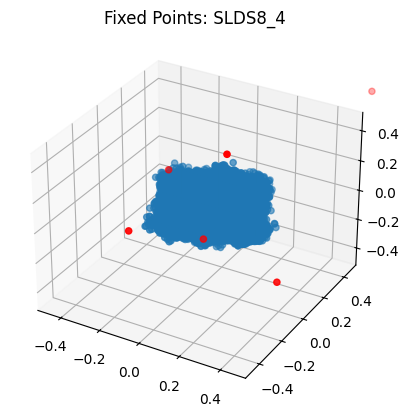

In [ ]:
slds_list = [slds8_4]
for slds in slds_list:
    slds.plot_fps()

In [ ]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)

Working on 1 of 26: GRU
Group: GRU
Rate R2: 0.9122868707711185
State R2: 0.8656370765054572
Working on 2 of 26: GRU
Group: GRU
Rate R2: 0.9166232088059927
State R2: 0.8502357091042566
Working on 3 of 26: GRU
Group: GRU
Rate R2: 0.9114562072159572
State R2: 0.8805933303185844
Working on 4 of 26: GRU
Group: GRU


KeyboardInterrupt: 

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

tt_latents = an_TT.get_latents(phase = 'val').detach().cpu().numpy()
gru_latents = analysis_GRU.get_latents(phase = 'val').detach().cpu().numpy()
lds_latents = analysis_LDS.get_latents(phase = 'val').detach().cpu().numpy()
node_latents = analysis_NODE.get_latents(phase = 'val').detach().cpu().numpy()

print(tt_latents.shape)
print(gru_latents.shape)
print(lds_latents.shape)
print(node_latents.shape)

# dict1 = {
#     'tt': tt_latents,
#     'gru': gru_latents,
#     'lds': lds_latents,
#     'node': node_latents
# }

# # Save dict as pickle
# import pickle
# with open('latents.pkl', 'wb') as f:
#     pickle.dump(dict1, f)


In [ ]:
lr_gru = LinearRegression()
lr_lds = LinearRegression()
lr_node = LinearRegression()

tt_latents_flat = tt_latents.reshape(-1, tt_latents.shape[-1])
gru_latents_flat = gru_latents.reshape(-1, gru_latents.shape[-1])
lds_latents_flat = lds_latents.reshape(-1, lds_latents.shape[-1])
node_latents_flat = node_latents.reshape(-1, node_latents.shape[-1])

lr_gru.fit(gru_latents_flat, tt_latents_flat)
lr_lds.fit(lds_latents_flat, tt_latents_flat)
lr_node.fit(node_latents_flat, tt_latents_flat)


gru_latents_pred = lr_gru.predict(gru_latents_flat)
lds_latents_pred = lr_lds.predict(lds_latents_flat)
node_latents_pred = lr_node.predict(node_latents_flat)

print(gru_latents_pred.shape)
gru_lats_tt = gru_latents_pred.reshape(tt_latents.shape)
lds_lats_tt = lds_latents_pred.reshape(tt_latents.shape)
node_lats_tt = node_latents_pred.reshape(tt_latents.shape)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(tt_latents[0,:,0], label = "TT")
ax.plot(gru_lats_tt[0,:,0], label = "GRU")
ax.plot(lds_lats_tt[0,:,0], label = "LDS")
ax.plot(node_lats_tt[0,:,0], label = "NODE")

ax.legend()


In [ ]:
r2_vals = comparison_single.plot_neural_preds(neuron_list =[1,2], trial_list = [5,10])

In [ ]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.load_analysis(slds3_1, group = "SLDS3")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
# comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


In [ ]:

def visualize_stateR2(comp, num_trials=2, ref_ind = None, pcs_to_plot = [7,8,9,10,11]):
    self = comp
    if ref_ind is None:
        ref_ind = self.ref_ind
    if ref_ind is None and self.ref_ind is None:
        # Throw an error
        raise ValueError("No reference index provided")
    ref_lats = (
        self.analyses[ref_ind]
        .get_latents(
            phase="val",
        )
        .detach()
        .numpy()
    )
    pca = PCA()
    ref_lats_flat = ref_lats.reshape(
        ref_lats.shape[0] * ref_lats.shape[1], ref_lats.shape[2]
    )
    ref_lats_pca_flat = pca.fit_transform(ref_lats_flat)
    ref_lats_pca = ref_lats_pca_flat.reshape(ref_lats.shape)

    fig = plt.figure(figsize = (20,10))
    axes = fig.subplots(self.num_analyses, len(pcs_to_plot))
    for i in range(self.num_analyses):
        latents = self.analyses[i].get_latents(phase="val").detach().numpy()
        pca_DT = PCA()

        lats_flat = latents.reshape(
            latents.shape[0] * latents.shape[1], latents.shape[2]
        )
        lats_pca_flat = pca_DT.fit_transform(lats_flat)

        reg = LinearRegression().fit(ref_lats_pca_flat, lats_pca_flat)
        pred_latents_pca_flat = reg.predict(ref_lats_pca_flat)
        r2_scores = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='raw_values')
        var_r2_score = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='variance_weighted')
        print(f"R2 Score for {self.analyses[i].run_name}: {var_r2_score}")
        pred_latents_pca = pred_latents_pca_flat.reshape(latents.shape)
        lats_pca = lats_pca_flat.reshape(latents.shape)

        for j in range(len(pcs_to_plot)):
            pc_num = pcs_to_plot[j] + 1
            if pc_num < latents.shape[2]:
                axes[i, j].plot(pred_latents_pca[0, :100, pc_num], c = 'r', label="Predicted from TT")
                axes[i, j].plot(lats_pca[0, :100, pc_num], c = 'k', label = "True from DT")
                axes[i, j].text(75, .01, s= f"R2: {r2_scores[pc_num]:.2f}")
            else:
                axes[i, j].plot(np.zeros(lats_pca[0, :100, 0].shape), label = "Predicted from TT") 
            if i == self.num_analyses - 1:
                axes[i, j].set_xlabel("Time")
            else:
                axes[i, j].set_xticks([])

        axes[i, 0].set_ylabel(f"{self.analyses[i].run_name}")
    plt.savefig(f"state_r2_dims.pdf")

In [ ]:
analysis_NODE.plot_scree(max_pcs = 12   )

In [ ]:
analysis_GRU.plot_scree(max_pcs = 12)

In [ ]:
analysis_LDS.plot_scree(max_pcs = 12)

In [ ]:

visualize_stateR2(comparison_single, pcs_to_plot=[7,8,9,10,11,12])

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)